# Import Libraries

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import xgboost as xgb

import sklearn.metrics
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

import time



# Get the Data

In [2]:
data1 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Training.csv')

In [3]:
print(data1.columns)
print(data1.shape)

Index(['Mean', 'SD', 'Entropy', 'RMS', 'Kurtosis', 'Skewness', 'GLCM1',
       'GLCM2', 'GLCM3', 'GLCM4', 'GLCM5', 'GLCM6', 'GLCM7', 'GLCM8', 'GLCM9',
       'GLCM10', 'GLCM11', 'GLCM12', 'GLCM13', 'GLCM14', 'GLCM15', 'GLCM16',
       'GLCM17', 'GLCM18', 'LBP1', 'LBP2', 'LBP3', 'LBP4', 'LBP5', 'LBP6',
       'LBP7', 'LBP8', 'LBP9', 'LBP10', 'Label'],
      dtype='object')
(5000, 35)


In [4]:
data1.describe()

,Mean,SD,Entropy,RMS,Kurtosis,Skewness,GLCM1,GLCM2,GLCM3,GLCM4,...,LBP1,LBP2,LBP3,LBP4,LBP5,LBP6,LBP7,LBP8,LBP9,LBP10
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.032799,0.096077,0.081342,-0.082138,0.077215,0.081772,0.066670,0.062713,0.088863,0.076157,...,-0.038476,-0.007739,-0.048717,0.023747,0.051774,0.015243,-0.040220,-0.094079,0.019059,-0.046448
std,0.999730,1.009528,0.994875,0.917837,1.031428,1.005400,1.017148,0.991063,0.975136,1.052608,...,0.969615,0.992469,1.015023,0.974649,0.983420,0.975271,0.924840,0.980025,0.978934,0.980524
min,-2.832218,-2.042955,-3.034173,-3.306187,-1.945913,-1.767257,-1.640993,-2.304767,-4.374324,-0.976784,...,-4.140227,-9.563809,-9.135800,-4.096251,-3.524551,-4.508172,-5.256574,-9.751189,-4.236972,-5.603814
25%,-0.618392,-0.610167,-0.552848,-0.745749,-0.486556,-0.641783,-0.670316,-0.677414,-0.478899,-0.417552,...,-0.732982,-0.601774,-0.705331,-0.608758,-0.640777,-0.626617,-0.655679,-0.676255,-0.719844,-0.776374
50%,0.042898,0.006844,0.149770,-0.076598,-0.228184,-0.105066,-0.032270,0.126199,0.154992,-0.192368,...,-0.216291,0.032746,-0.034089,0.185258,0.182568,0.112527,0.018800,-0.063518,-0.116060,-0.171409
75%,0.674051,0.589582,0.702692,0.573872,0.438481,0.646096,0.580576,0.814994,0.679061,0.177285,...,0.671595,0.653298,0.621637,0.723739,0.779342,0.669787,0.612077,0.522758,0.744077,0.709266
max,5.134343,5.785962,3.697522,2.842157,15.528410,8.745649,5.929200,3.516487,3.445425,14.118107,...,4.212088,2.867139,3.584903,2.994803,5.084974,4.575143,3.351600,3.814038,3.750347,3.596551


In [5]:
data1.head()

,Mean,SD,Entropy,RMS,Kurtosis,Skewness,GLCM1,GLCM2,GLCM3,GLCM4,...,LBP2,LBP3,LBP4,LBP5,LBP6,LBP7,LBP8,LBP9,LBP10,Label
0,2.030570,1.910645,1.763380,-1.106532,-0.298925,0.060138,2.136146,1.825162,0.959103,1.372025,...,1.352792,-0.229456,-0.285086,-0.252029,-1.501633,-1.486186,0.619805,0.904297,0.537212,HFB
1,2.540950,2.035585,2.021876,-0.427589,0.021946,0.280804,2.467825,2.013120,1.186707,2.363135,...,1.440689,-1.398388,-0.342024,-0.594918,-1.067771,-1.290755,1.069021,0.654516,0.751853,HFB
2,2.130183,2.011535,1.849540,-0.733343,0.807084,0.916084,2.192809,1.850896,1.290191,3.207098,...,1.236149,0.075863,-0.792273,-0.716795,-1.110095,-1.658564,1.554926,0.889386,0.798461,HFB
3,1.971550,1.953266,1.775731,-0.842897,0.726709,0.988045,2.089074,1.889163,1.223390,2.992815,...,2.138237,0.183480,-0.713386,-0.542280,-1.392077,-1.344933,0.888508,0.793877,0.693045,HFB
4,-0.392299,0.166806,0.002802,-2.024223,-0.593638,-0.207614,-0.130717,0.261630,-0.361021,-0.493872,...,1.736367,0.139826,-2.355790,-2.015931,-1.532237,-1.476702,-1.181700,2.344510,1.340334,HFB


In [6]:
low_cardinality_cols = [cname for cname in data1.columns if 
                                data1[cname].nunique() < 10] #and
                                #X[cname].dtype == "object"]

numeric_cols = [cname for cname in data1.columns if 
                                data1[cname].dtype in ['int64', 'float64']]
#print(low_cardinality_cols)
#print(numeric_cols)

# Train Test Split

In [7]:
X = data1.drop('Label',axis=1)
y = data1['Label']
y1 = y.astype("category").cat.codes
data_dmatrix = xgb.DMatrix(data=X,label=y1,feature_names=X.columns)
#X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.30, random_state=101)


X_train = X #training data
y_train = y1 #training label
X_train
y_train


0       0
1       0
2       0
3       0
4       0
       ..
4995    4
4996    4
4997    4
4998    4
4999    4
Length: 5000, dtype: int8

In [8]:
data2 = pd.read_csv('ExtractedFeatures_standardized_InVitro_MonoB_Testing.csv')
X2 = data2.drop('Label',axis=1)
y2 = data2['Label']
y3 = y2.astype("category").cat.codes
data_dmatrix2 = xgb.DMatrix(data=X2,label=y3,feature_names=X2.columns)
X_test = X2 #testing data
y_test = y3 #testing label
X_test
y_test

0      0
1      0
2      0
3      0
4      0
      ..
995    4
996    4
997    4
998    4
999    4
Length: 1000, dtype: int8

# Create Model: XGBoost, testing hyperparameters with GridSearchCV

In [28]:
from sklearn.metrics import mean_absolute_error
xgb_model = xgb.XGBClassifier(tree_method='gpu_hist')
clf = GridSearchCV(xgb_model, {'max_depth': [2,4, 6],
                               'n_estimators': [100, 500,1000],
                               'learning_rate': [ 0.01,0.05, 0.1] },
                                verbose=10,n_jobs=1)

training_start = time.perf_counter()
clf.fit(X_train, y_train) 
print(clf.best_score_)
print(clf.best_params_)
training_end = time.perf_counter()



Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=0.469, total=   0.7s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=0.783, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=0.701, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=0.569, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.9s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, score=0.460, total=   0.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=500, score=0.533, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=500, score=0.841, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.5s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=500, score=0.773, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.6s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=500, score=0.703, total=   2.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=500 ...............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.6s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=2, n_estimators=500, score=0.595, total=   2.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, score=0.587, total=   4.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, score=0.861, total=   4.1s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, score=0.844, total=   4.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, score=0.839, total=   4.0s
[CV] learning_rate=0.01, max_depth=2, n_estimators=1000 ..............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=1000, score=0.682, total=   4.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, score=0.

[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, score=0.896, total=   1.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, score=0.895, total=   1.3s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, score=0.752, total=   1.3s
[CV] learning_rate=0.05, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=500, score=0.752, total=   5.4s
[CV] learning_rate=0.05, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=500, score=0.972, total=   5.6s
[CV] learning_rate=0.05, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=500, score=0.927, total=   5.6s
[CV] learning_rate=0.05, max_depth=4, n_estimators=500 ...............
[CV]  learning_rate=0.05, max_depth=4, n_estimators=500, score=0.946, 

[CV]  learning_rate=0.1, max_depth=4, n_estimators=1000, score=0.754, total=   6.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=1000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=1000, score=0.980, total=   7.9s
[CV] learning_rate=0.1, max_depth=4, n_estimators=1000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=1000, score=0.930, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=1000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=1000, score=0.937, total=   7.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=1000 ...............
[CV]  learning_rate=0.1, max_depth=4, n_estimators=1000, score=0.831, total=   7.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=0.737, total=   2.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=6, n_estimators=100, score=0.966, to

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 13.4min finished


0.8892
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


# Evaluate Model on Test Set

In [29]:
testing_start = time.perf_counter()
preds = clf.best_estimator_.predict(X_test)
testing_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 89.60


In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf.best_estimator_, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.75  0.974 0.928 0.948 0.846]
Cross validation accuracy: 0.89


# Feature Importance and Confusion Matrix

{0: 'Mean', 1: 'SD', 2: 'Entropy', 3: 'RMS', 4: 'Kurtosis', 5: 'Skewness', 6: 'GLCM1', 7: 'GLCM2', 8: 'GLCM3', 9: 'GLCM4', 10: 'GLCM5', 11: 'GLCM6', 12: 'GLCM7', 13: 'GLCM8', 14: 'GLCM9', 15: 'GLCM10', 16: 'GLCM11', 17: 'GLCM12', 18: 'GLCM13', 19: 'GLCM14', 20: 'GLCM15', 21: 'GLCM16', 22: 'GLCM17', 23: 'GLCM18', 24: 'LBP1', 25: 'LBP2', 26: 'LBP3', 27: 'LBP4', 28: 'LBP5', 29: 'LBP6', 30: 'LBP7', 31: 'LBP8', 32: 'LBP9', 33: 'LBP10'}


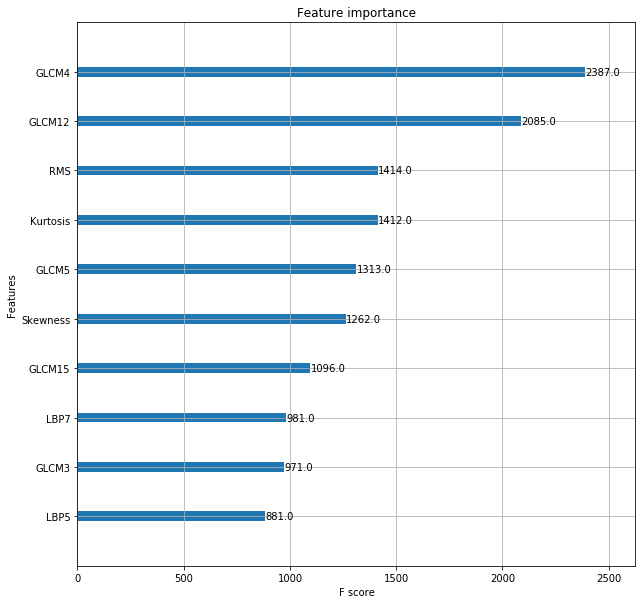

In [32]:
# create dict to use later
myfeatures = X.columns
dict_features = dict(enumerate(myfeatures))

# feat importance with names f1,f2,...
fig, ax = plt.subplots(1,1,figsize=(10,10))
axsub = xgb.plot_importance(clf.best_estimator_, max_num_features=10, ax=ax )

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(myfeatures))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
#lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

In [33]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#fig, ax = plt.subplots(figsize=(10,10))
#cmp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test,preds, normalize = 'true', cmap = 'Blues',ax=ax)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       200
           1       0.85      0.79      0.82       200
           2       0.87      0.99      0.93       200
           3       0.95      0.80      0.87       200
           4       0.95      0.94      0.94       200

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.89      1000
weighted avg       0.90      0.90      0.89      1000



In [34]:
print(confusion_matrix(y_test,preds))

[[193   0   1   2   4]
 [  6 157  28   7   2]
 [  0   1 199   0   0]
 [ 10  27   0 160   3]
 [ 13   0   0   0 187]]


# XGBoost without hyperparameter tuning

In [10]:
from xgboost import XGBClassifier

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
       
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

training_start = time.perf_counter()
# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)
training_end = time.perf_counter()
print(training_end)

1513.1357467


In [12]:
help(training_end)

Help on float object:

class float(object)
 |  float(x=0, /)
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(self, format_spec, /)
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __int__(self, /)
 |      int(self)
 |  
 |  __le__

In [11]:
testing_start = time.perf_counter()
preds = xgb_clf.predict(X_test)
testing_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print(testing_end)

XGBoost's prediction accuracy is: 87.10
1520.9122805


In [39]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_clf, X_train,y_train, cv=5, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Cross validation accuracy: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.662 0.923 0.898 0.877 0.781]
Cross validation accuracy: 0.83


In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       200
           1       0.80      0.69      0.74       200
           2       0.85      0.98      0.91       200
           3       0.85      0.74      0.79       200
           4       0.92      0.98      0.95       200

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

